# Predicción de precios de laptops  (Regresión Lineal)

Datos: https://www.kaggle.com/datasets/muhammetvarl/laptop-price

## Sobre el dataset

 - Company- String -Laptop Manufacturer
 - Product -String -Brand and Model
 - TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
 - Inches -Numeric- Screen Size
 - ScreenResolution -String- Screen Resolution
 - Cpu- String -Central Processing Unit (CPU)
 - Ram -String- Laptop RAM
 - Memory -String- Hard Disk / SSD Memory
 - GPU -String- Graphics Processing Units (GPU)
 - OpSys -String- Operating System
 - Weight -String- Laptop Weight
 - Price_euros -Numeric- Price (Euro)

## Carga de la libreria y de los datos

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
laptops = pd.read_csv("data/kaggle/laptopPrice.csv")

---

## Exploración de datos

In [15]:
laptops.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [16]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [17]:
laptops.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


### Información sobre el dataset

- Cuenta con 823 entradas (Filas) y 19 variables (Columnas)
- No hay valores nulos
- La mayoria de las columnas son object
- La variable Price es una variable de tipo entero
- Unicamente tres columnas son de tipo numerico entero

---

## Eliminar Outliers

In [18]:
# Seleccion de columnas numericas
numerical_columns = ['Price', 'Number of Ratings', 'Number of Reviews']

# eliminar valores atipicos
laptops = laptops[(np.abs(stats.zscore(laptops[numerical_columns])) < 3).all(axis=1)]

In [20]:
print("Despues de eliminar los outliers, tenemos {} filas.".format(laptops.shape[0]))


Despues de eliminar los outliers, tenemos 785 filas.


---

## Exploración de los datos

### Distribución y correlación de los datos

<Figure size 640x480 with 0 Axes>

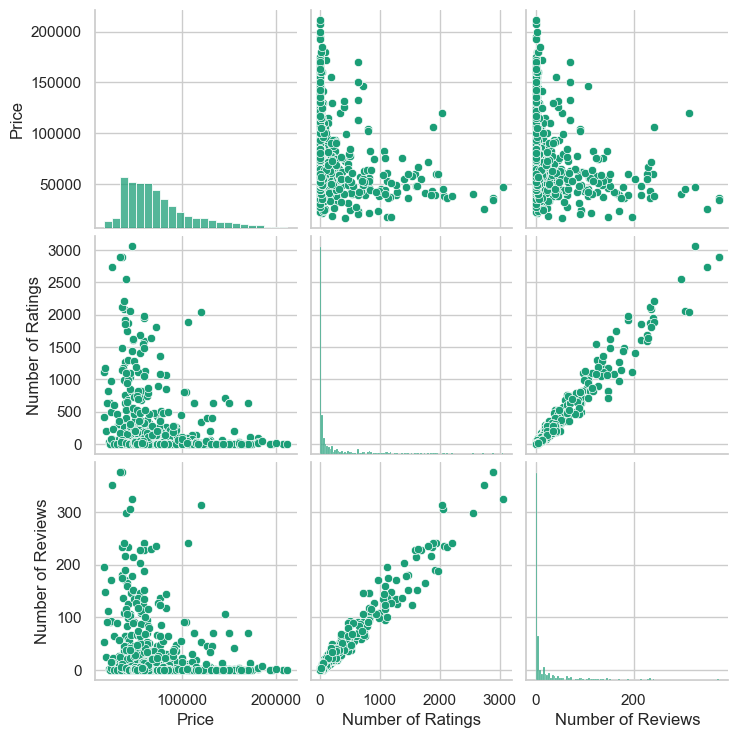

In [28]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette("Dark2")
sns.despine()

sns.pairplot(laptops);

plt.show()


Se observa una alta correlacion entre "Number of Rating" con "Number of Reviews"

### Regresion Lineal de las columnas correlacionadas

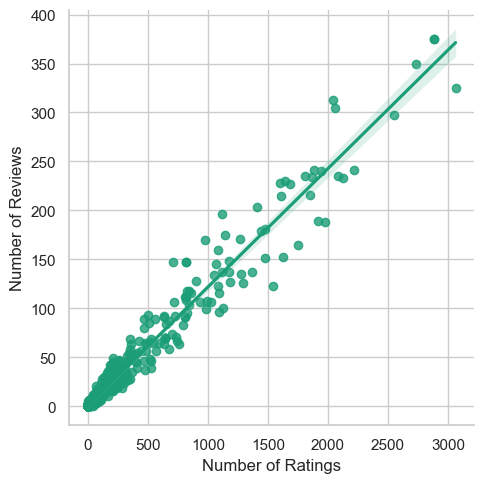

In [33]:
sns.lmplot(x='Number of Ratings',y='Number of Reviews',data=laptops)

plt.show()


### Distribución de las variables numericas

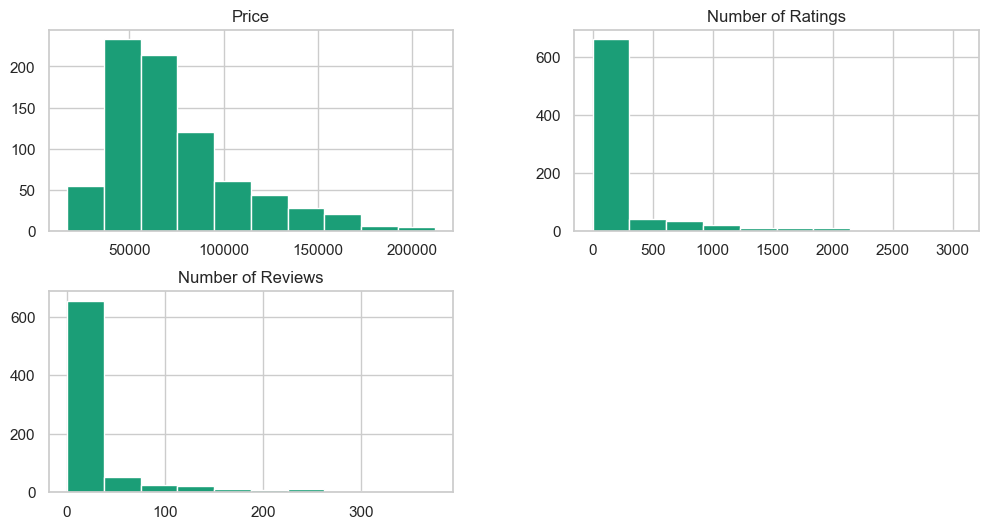

In [36]:
laptops[numerical_columns].hist(figsize=(12, 6));

plt.show()

## Observaciones de los plots

- Hay una fuerte correlación entre el Number of Rating y Number of Reviews
- Existe una correlación negativa entre el Price y Number of Ratings, lo que indica que las laptos con precio mas alto tienen menos reseñas y calificaciones
- La distribución de todos nuestros variables numéricos es sesgada a la derecha.

## Exploración de datos univariada

### Marcas

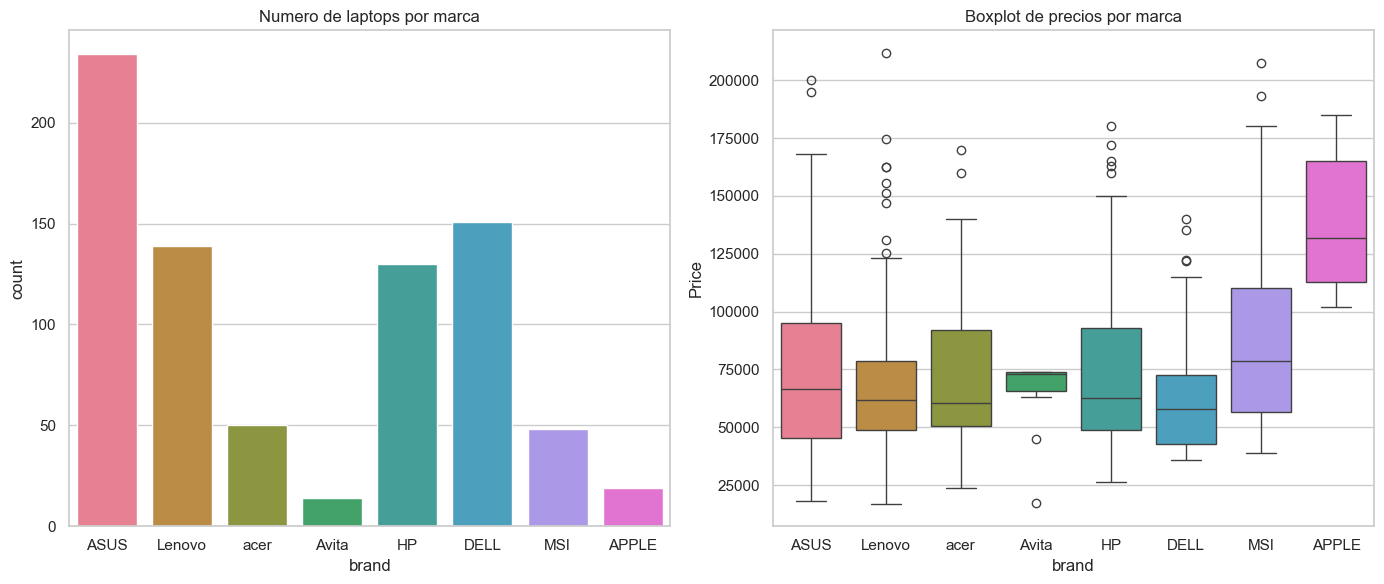

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.brand, hue=laptops.brand, palette='husl', legend=False)
axes[0].set_title("Numero de laptops por marca")

sns.boxplot(ax=axes[1], x=laptops.brand, y=laptops.Price, hue=laptops.brand, palette='husl', legend=False)
axes[1].set_title("Boxplot de precios por marca")

plt.tight_layout()
plt.show()

### Procesadores por marca

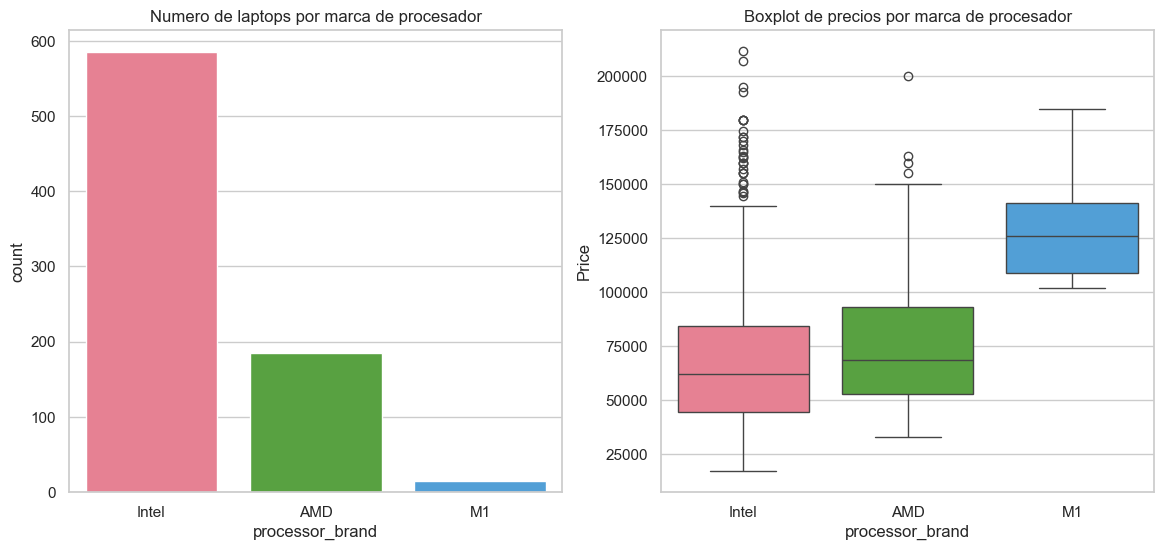

In [51]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_brand, hue=laptops.processor_brand, palette="husl")
axes[0].set_title("Numero de laptops por marca de procesador")

sns.boxplot(ax=axes[1],  x=laptops.processor_brand, y=laptops.Price, hue=laptops.processor_brand, palette="husl")
axes[1].set_title("Boxplot de precios por marca de procesador")

plt.show()


### Numero de procesadores

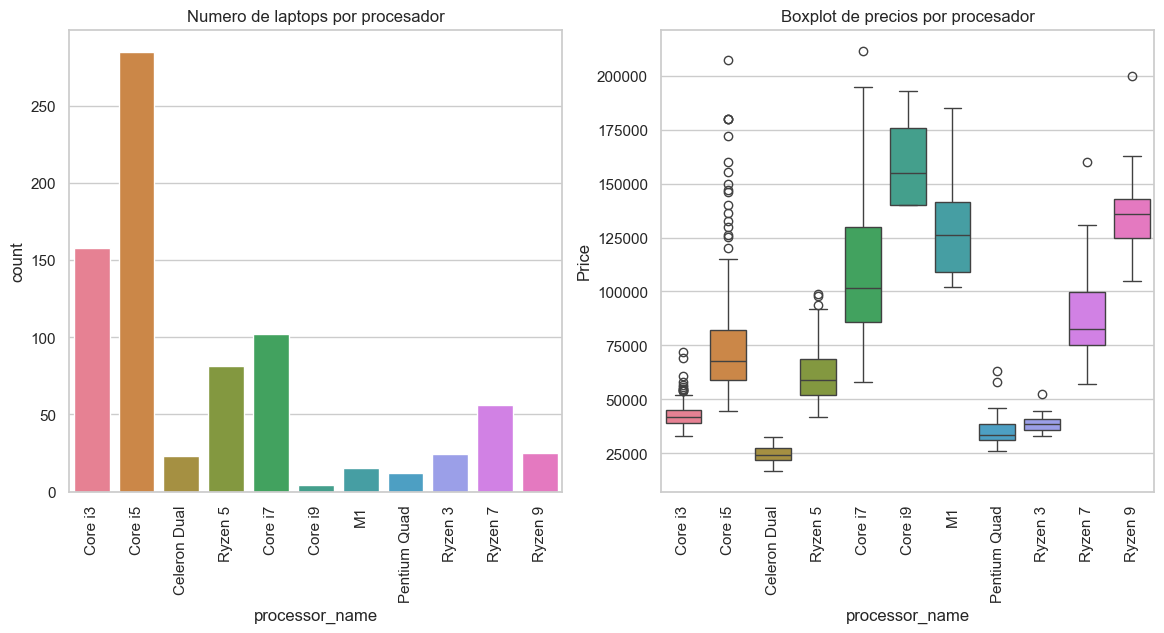

In [50]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_name, hue=laptops.processor_name, palette="husl")
axes[0].set_title("Numero de laptops por procesador")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=laptops.processor_name, y=laptops.Price, hue=laptops.processor_name, palette="husl")
axes[1].set_title("Boxplot de precios por procesador")
axes[1].tick_params(axis='x', rotation=90)

plt.show()


### Generación del procesador

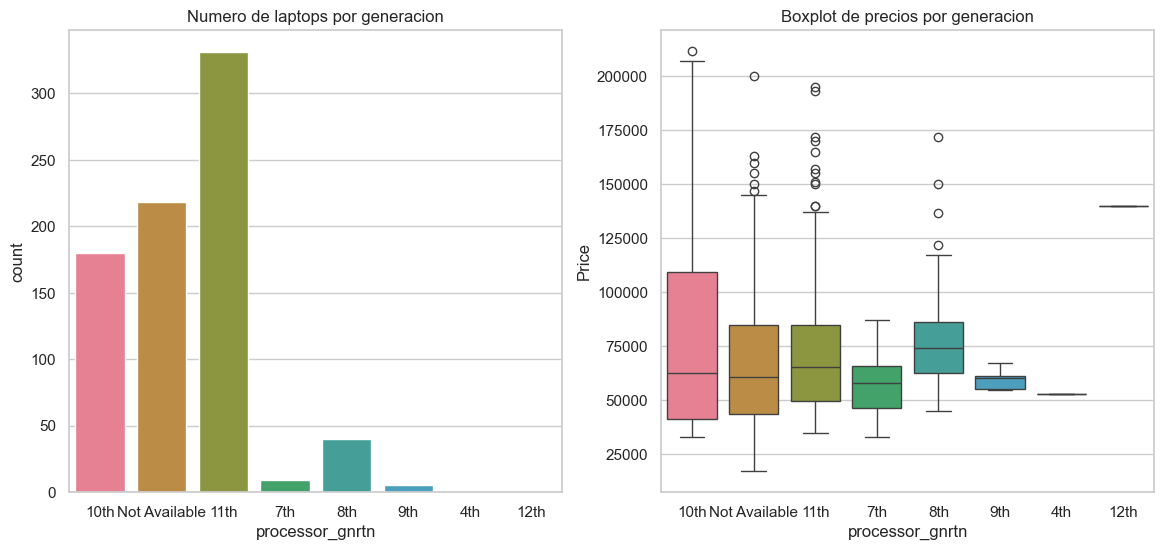

In [55]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_gnrtn, hue=laptops.processor_gnrtn, palette="husl")
axes[0].set_title("Numero de laptops por generacion")

sns.boxplot(ax=axes[1], x=laptops.processor_gnrtn, y=laptops.Price, hue=laptops.processor_gnrtn, palette="husl")
axes[1].set_title("Boxplot de precios por generacion")

plt.show()


### Ram GB

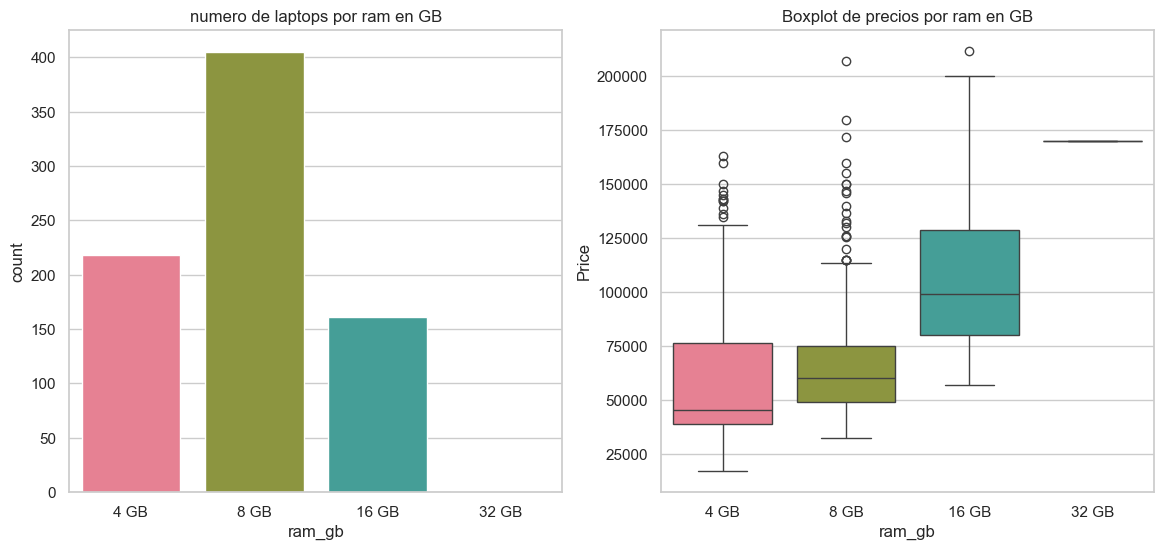

In [56]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ram_gb, hue=laptops.ram_gb, palette="husl")
axes[0].set_title("numero de laptops por ram en GB")

sns.boxplot(ax=axes[1], x=laptops.ram_gb, y=laptops.Price, hue=laptops.ram_gb, palette="husl")
axes[1].set_title("Boxplot de precios por ram en GB")

plt.show()


### Por disco en estado solido (SSD)

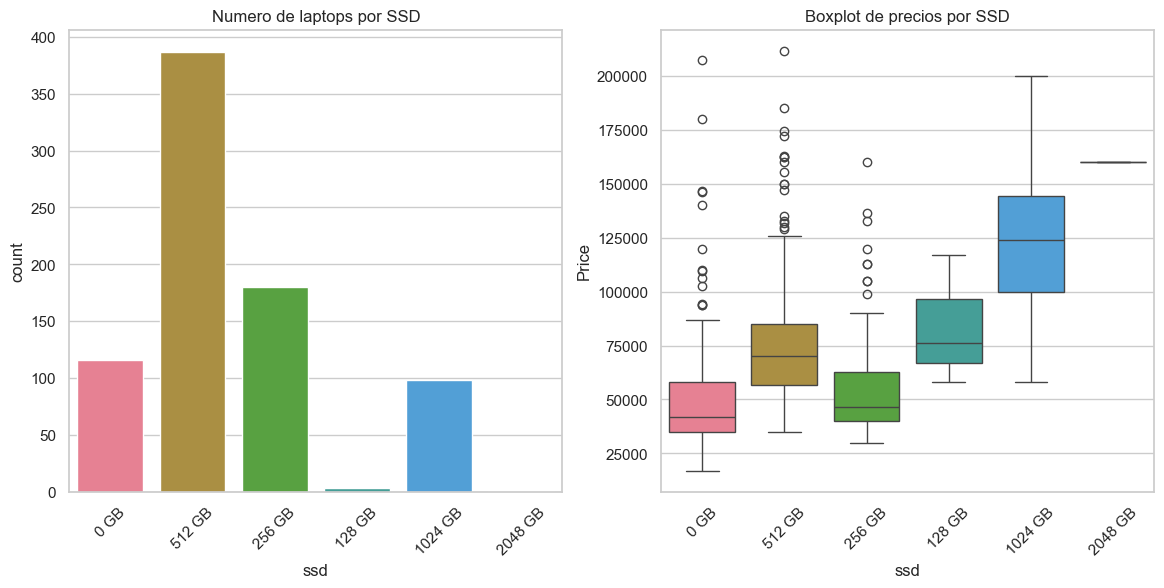

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ssd, hue=laptops.ssd, palette="husl")
axes[0].set_title("Numero de laptops por SSD")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x=laptops.ssd, y=laptops.Price, hue=laptops.ssd, palette="husl")
axes[1].set_title("Boxplot de precios por SSD")
axes[1].tick_params(axis='x', rotation=45)

plt.show()


### Touchscreen

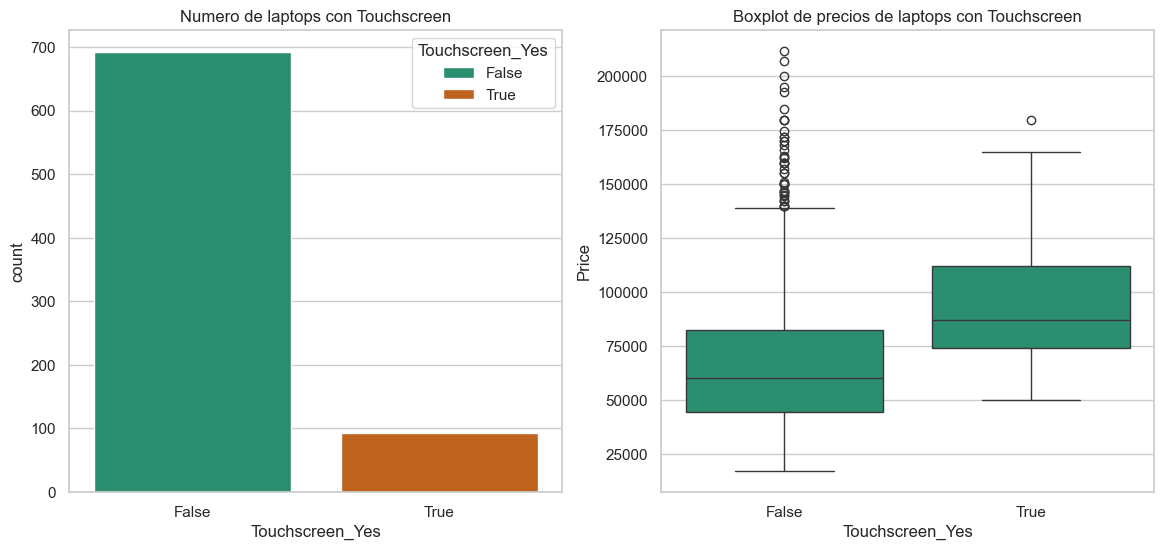

In [76]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.Touchscreen_Yes, hue=laptops.Touchscreen_Yes)
axes[0].set_title("Numero de laptops con Touchscreen")

sns.boxplot(ax=axes[1], x=laptops.Touchscreen_Yes, y=laptops.Price)
axes[1].set_title("Boxplot de precios de laptops con Touchscreen")

plt.show()


---

# Procesamiento de los datos


In [ ]:
categorical_variables = laptops.columns[laptops.dtypes == 'object']

laptops = pd.get_dummies(laptops, columns=categorical_variables, drop_first=True)

laptops.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,69990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,26990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [77]:
print("Despues realizar un encoding a los datos, tenemos {} columns.".format(laptops.shape[1]))


Despues realizar un encoding a los datos, tenemos 63 columns.


### Entrenamento y Test

In [60]:
X = laptops.loc[:, laptops.columns != "Price"]


In [61]:
y = laptops['Price']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Regresion Lineal

In [63]:
lm = LinearRegression()

lm.fit(X=X_train, y=y_train)

LinearRegression()

### Prediccion

In [64]:
predictions = lm.predict(X_test)


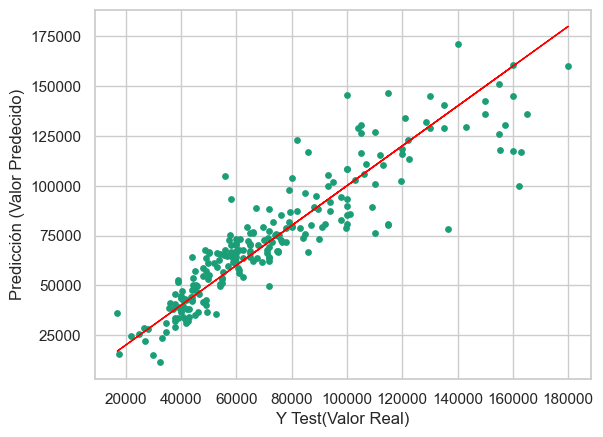

In [66]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test(Valor Real)')
plt.ylabel('Predicción (Valor Predecido)')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

## Evaluando el modelo

In [67]:
print("R^2 en datos de entrenamiento ",lm.score(X_train, y_train))
print("R^2 en datos de test ",lm.score(X_test,y_test))

R^2 en datos de entrenamiento  0.84482353963854
R^2 en datos de test  0.8169458230221295


Nuestro R-cuadrado tiene un 0.81 en testing lo que es aproximandamente un 81% de la varianza en la variable dependiente (la variable que estamos tratando de predecir) es explicada por las variables independientes (los predictores). En otras palabras, significa que el modelo explica una gran porción de la variabilidad en los datos y realiza una explicación bastante buena de la relación entre las variables independientes y dependientes.

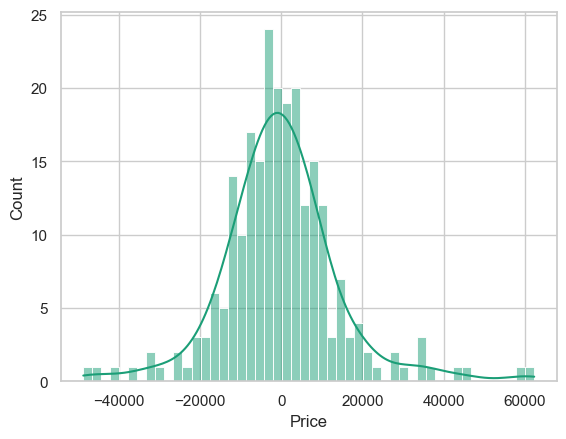

In [68]:
sns.histplot(x=(y_test-predictions), kde=True, bins=50)
plt.show()
